In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from lifelines import KaplanMeierFitter

In [2]:
data = 'EmployeeAttrition.csv'
employee_df = pd.read_csv(data)

In [3]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
employee_df.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
employee_df[employee_df.isnull()].count()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
employee_df.replace('No', 0, inplace=True)
employee_df.replace('Yes', 1, inplace=True)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Dropping unnecessary cols , and creating a new col

employee_df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)
employee_df.insert(loc=0, column='EmployeeID', value=np.arange(len(employee_df)))

In [10]:
current_year = 2020

employee_df['Year_Start_Company'] = current_year - employee_df.YearsAtCompany
employee_df['Year_Start_Role'] = current_year - employee_df.YearsInCurrentRole
employee_df['Year_Last_Promotion'] = current_year - employee_df.YearsSinceLastPromotion

employee_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year_Start_Company,Year_Start_Role,Year_Last_Promotion
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,8,0,1,6,4,0,5,2014,2016,2020
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,10,3,3,10,7,1,7,2010,2013,2019
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,7,3,3,0,0,0,0,2020,2020,2020
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,8,3,3,8,7,3,0,2012,2013,2017
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,6,3,3,2,2,2,2,2018,2018,2018


<AxesSubplot:xlabel='Year_Start_Company', ylabel='Count'>

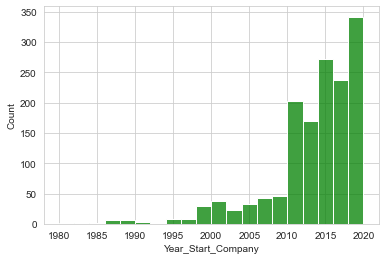

In [11]:
# Looking at frequency of when employees joined the company

sns.set_style('whitegrid')
sns.histplot(employee_df['Year_Start_Company'], kde = False, color ='green', bins = 20)

<AxesSubplot:xlabel='Year_Start_Role', ylabel='Count'>

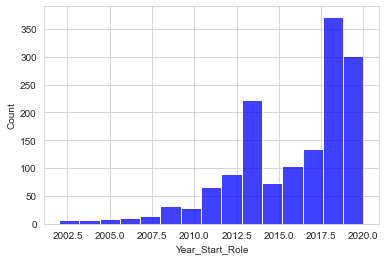

In [12]:
# Distribution of when employees started their current roles

sns.set_style('whitegrid')
sns.histplot(employee_df['Year_Start_Role'], kde = False, color ='blue', bins = 15)

<AxesSubplot:xlabel='Year_Last_Promotion', ylabel='Count'>

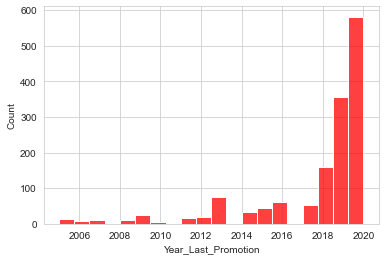

In [13]:
# Distribution of when employees were last promoted

sns.set_style('whitegrid')
sns.histplot(employee_df['Year_Last_Promotion'], kde = False, color ='red', bins = 20)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

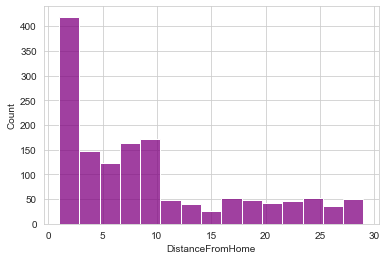

In [14]:
sns.set_style('whitegrid')
sns.histplot(employee_df['DistanceFromHome'], kde = False, color ='purple', bins = 15)

In [15]:
# Adding a conditional column to segment employees by commute distance

conditions = [(employee_df['DistanceFromHome'] <= 5),
              (employee_df['DistanceFromHome'] > 5) & (employee_df['DistanceFromHome'] <= 12),
              (employee_df['DistanceFromHome'] > 12)]

values = ['Close', 'Medium', 'Far']

employee_df['Commute'] = np.select(conditions, values)

employee_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year_Start_Company,Year_Start_Role,Year_Last_Promotion,Commute
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,0,1,6,4,0,5,2014,2016,2020,Close
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,3,3,10,7,1,7,2010,2013,2019,Medium
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,3,3,0,0,0,0,2020,2020,2020,Close
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,3,8,7,3,0,2012,2013,2017,Close
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,3,2,2,2,2,2018,2018,2018,Close


In [16]:
# Binning the Ages of Employees into Groups

bins= [18,30,40,100]
labels = ['Early Career','Mid-Career','Late Career']
employee_df['AgeGroup'] = pd.cut(employee_df['Age'], bins=bins, labels=labels, right=False)

In [17]:
age_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.AgeGroup],margins=True)
age_att_ct

Attrition,0,1,All
AgeGroup,,,
Early Career,235,91,326
Mid-Career,533,89,622
Late Career,465,57,522
All,1233,237,1470


In [18]:
employee_df.to_csv('NewEmpoyeeDataframe.csv')

In [19]:
retained = employee_df[employee_df['Attrition'] == 0]
gone = employee_df[employee_df['Attrition'] == 1]

print('Retained: {:d}, Gone: {:d}'.format(len(retained), len(gone)))

Retained: 1233, Gone: 237


In [20]:
# Looking at the percentage breakdown of employee attrition 

employee_df["Attrition"].value_counts()/employee_df.shape[0]

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [21]:
employee_df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

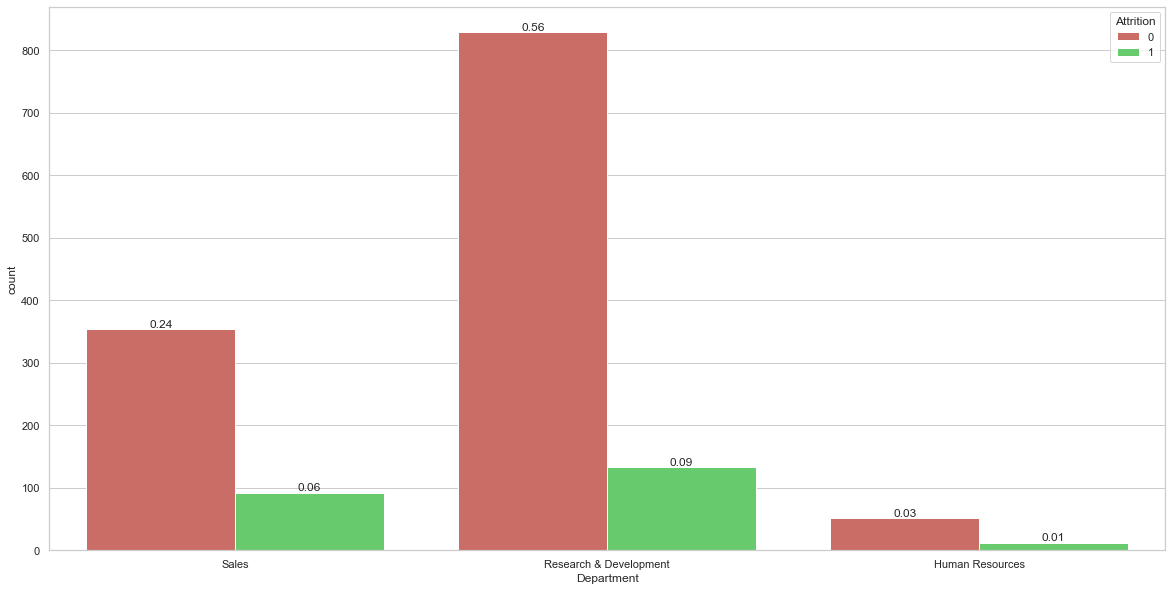

In [22]:
# Visualizing Attrition by Department

sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='Department', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [23]:
# Attrition Rate by Department

dept_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.Department],margins=True)
dept_att_ct

Attrition,0,1,All
Department,,,
Human Resources,51,12,63
Research & Development,828,133,961
Sales,354,92,446
All,1233,237,1470


In [24]:
print(dept_att_ct.iloc[0].values)
print(dept_att_ct.iloc[1].values)
print(dept_att_ct.iloc[2].values)

[51 12 63]
[828 133 961]
[354  92 446]


In [25]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([dept_att_ct.iloc[0].values, \
                                            dept_att_ct.iloc[1].values, \
                                            dept_att_ct.iloc[2].values])

In [26]:
print('chi2     : ', chi2)
print('p-value  : ', p)
print('Degrees of Freedom : ', dof)

chi2     :  10.79600732241067
p-value  :  0.028954847432695618
Degrees of Freedom :  4


Department segments tend to follow company wide attrition rate, with Sales Dept being slightly higher

----

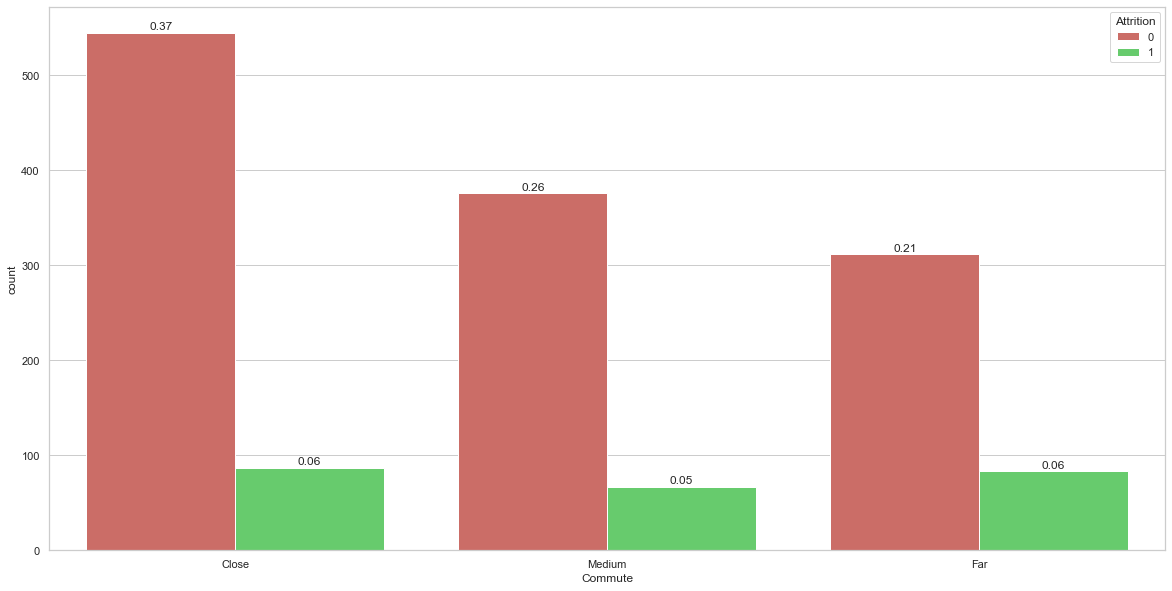

In [27]:
# Visualizing Attrition by Commute

sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='Commute', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [28]:
commute_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.Commute],margins=True, normalize='index')
commute_att_ct

Attrition,0,1
Commute,,
Close,0.862342,0.137658
Far,0.789873,0.210127
Medium,0.848758,0.151242
All,0.838776,0.161224


---

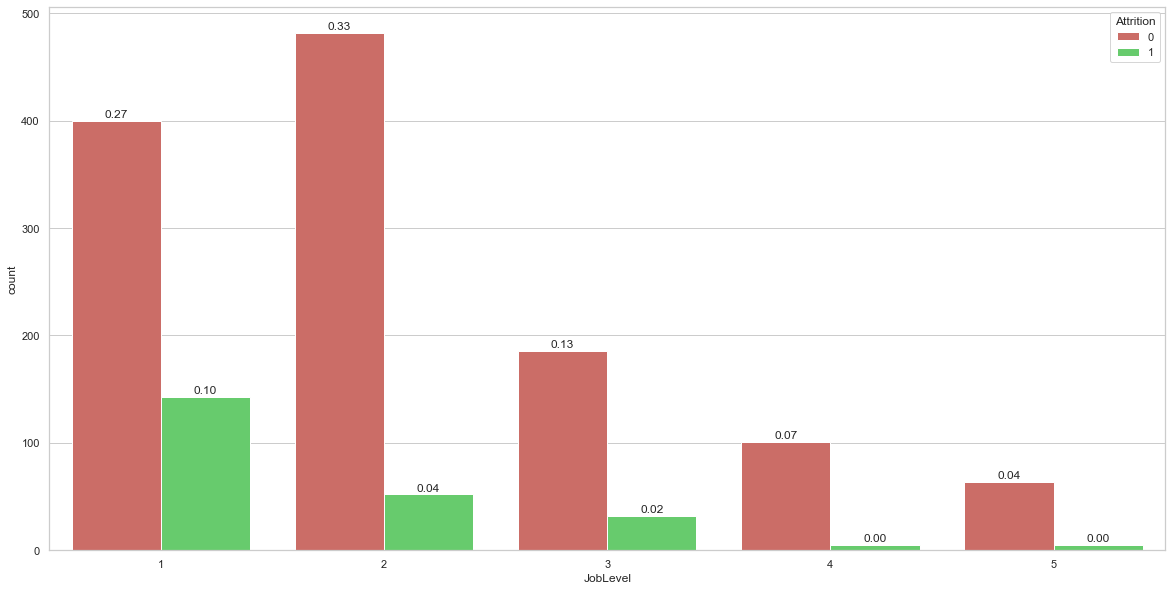

In [29]:
sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [30]:
joblev_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.JobLevel],margins=True)
joblev_att_ct

Attrition,0,1,All
JobLevel,,,
1,400,143,543
2,482,52,534
3,186,32,218
4,101,5,106
5,64,5,69
All,1233,237,1470


In [31]:
(chi2, p, dof, _) = stats.chi2_contingency([joblev_att_ct.iloc[0].values, \
                                            joblev_att_ct.iloc[1].values, \
                                            joblev_att_ct.iloc[2].values, \
                                            joblev_att_ct.iloc[3].values, \
                                            joblev_att_ct.iloc[4].values])

In [32]:
print('chi2     : ', chi2)
print('p-value  : ', p)
print('Degrees of Freedom : ', dof)

chi2     :  72.5290131066739
p-value  :  1.5389119340378346e-12
Degrees of Freedom :  8


Fairly unsurprising, more senior level roles have lower rates of attrition. Low level jobs have the highest turnover and there is a slight bump at 3 years which could be interesting to look at further. The 3 year point may be a common length of time in which an employee may consider leaving

---

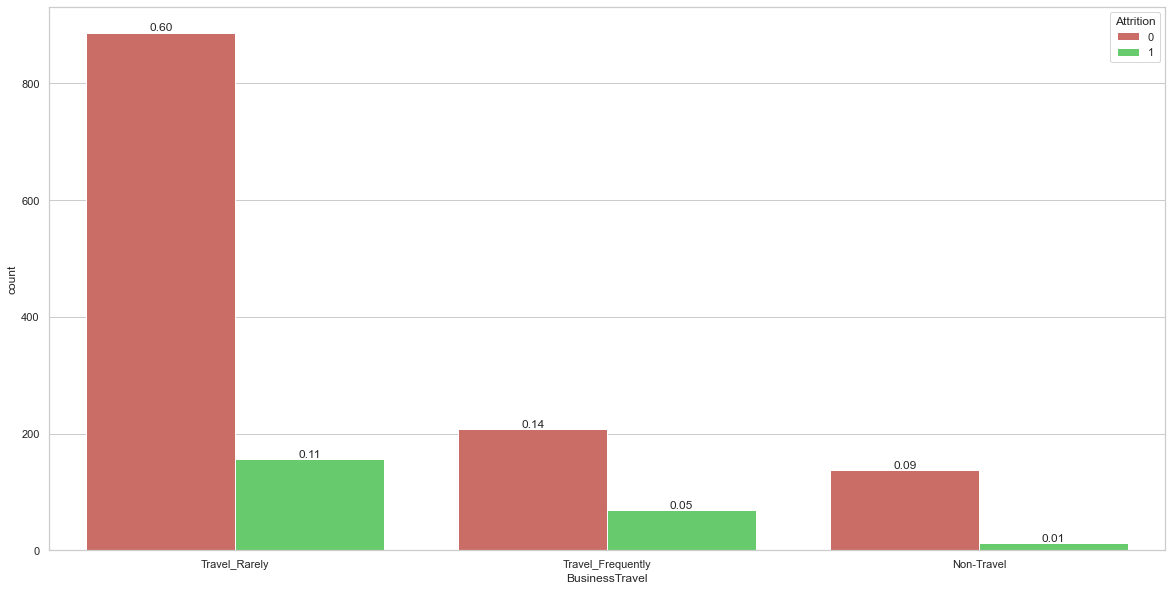

In [33]:
# Attrition by Travel Frequency

sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [34]:
# Attrition Rate by Travel

trav_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.BusinessTravel],margins=True)
trav_att_ct

Attrition,0,1,All
BusinessTravel,,,
Non-Travel,138,12,150
Travel_Frequently,208,69,277
Travel_Rarely,887,156,1043
All,1233,237,1470


In [35]:
(chi2, p, dof, _) = stats.chi2_contingency([trav_att_ct.iloc[0].values, \
                                            trav_att_ct.iloc[1].values, \
                                            trav_att_ct.iloc[2].values])

In [36]:
print('chi2     : ', chi2)
print('p-value  : ', p)
print('Degrees of Freedom : ', dof)

chi2     :  24.18241368565517
p-value  :  7.34235322128833e-05
Degrees of Freedom :  4


Employees who travel more tend to leave in higher numbers

---

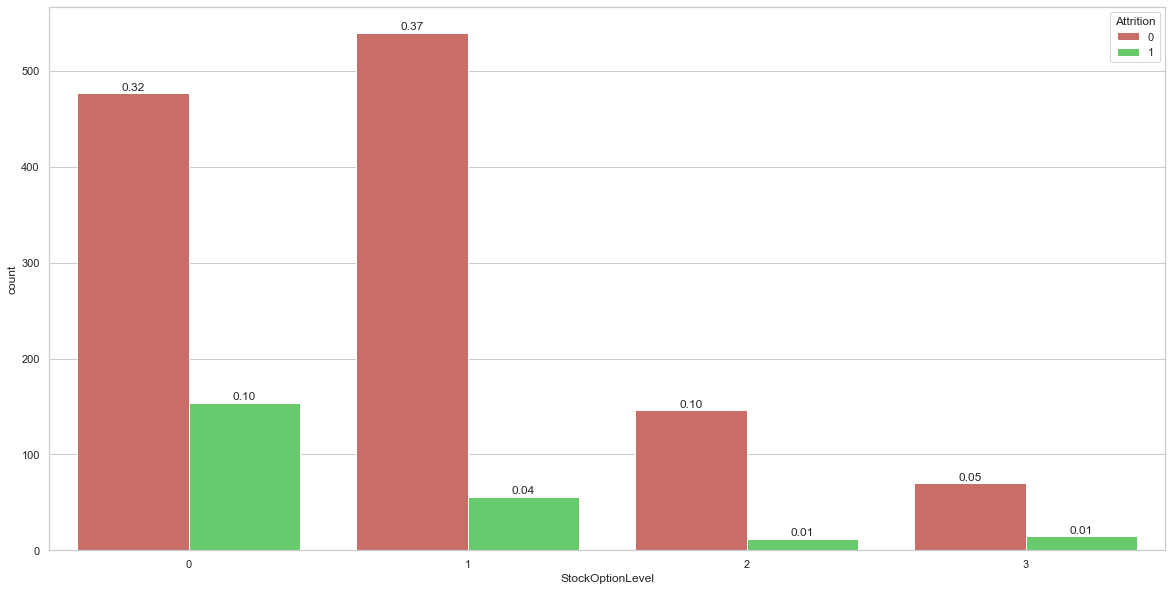

In [37]:
# Attrition by Stock Option Level

sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='StockOptionLevel', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [38]:
stock_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.StockOptionLevel],margins=True)
stock_att_ct

Attrition,0,1,All
StockOptionLevel,,,
0,477,154,631
1,540,56,596
2,146,12,158
3,70,15,85
All,1233,237,1470


In [39]:
(chi2, p, dof, _) = stats.chi2_contingency([stock_att_ct.iloc[0].values, \
                                            stock_att_ct.iloc[1].values, \
                                            stock_att_ct.iloc[2].values])

In [40]:
print('chi2     : ', chi2)
print('p-value  : ', p)
print('Degrees of Freedom : ', dof)

chi2     :  60.72832246003561
p-value  :  2.039135135698914e-12
Degrees of Freedom :  4


----

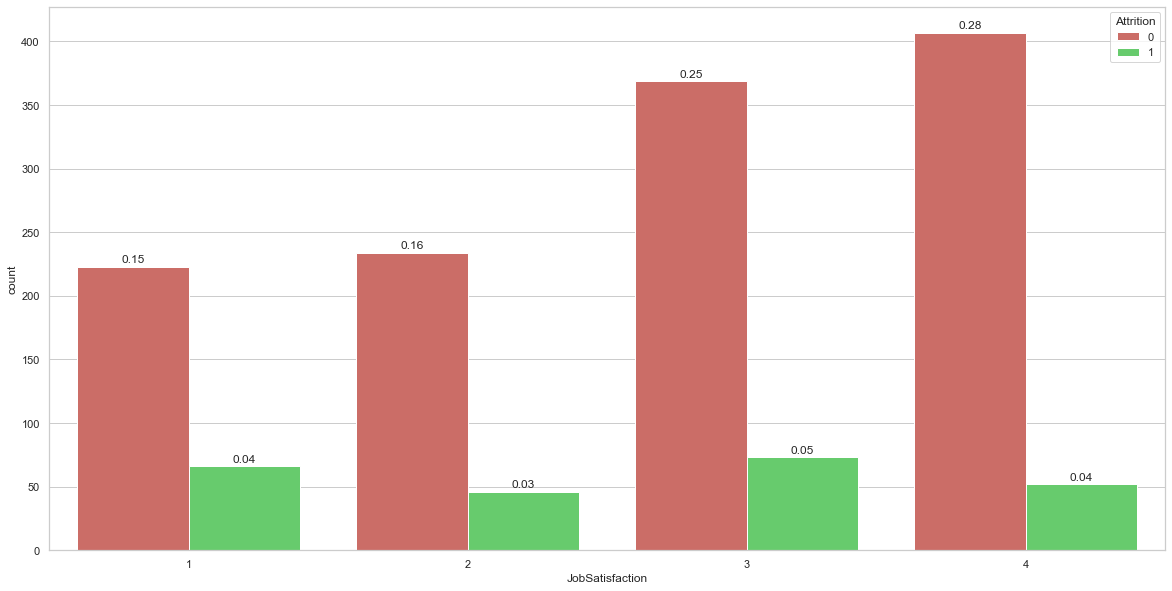

In [41]:
# Attrition Rate by JobSatisfaction

sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [42]:
jobsat_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.JobSatisfaction],margins=True,normalize='index')
jobsat_att_ct

Attrition,0,1
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [43]:
(chi2, p, dof, _) = stats.chi2_contingency([jobsat_att_ct.iloc[0].values, \
                                            jobsat_att_ct.iloc[1].values, \
                                            jobsat_att_ct.iloc[2].values, \
                                            jobsat_att_ct.iloc[3].values])

In [44]:
print('chi2     : ', chi2)
print('p-value  : ', p)
print('Degrees of Freedom : ', dof)

chi2     :  0.04769727640144786
p-value  :  0.9972688015736123
Degrees of Freedom :  3


---

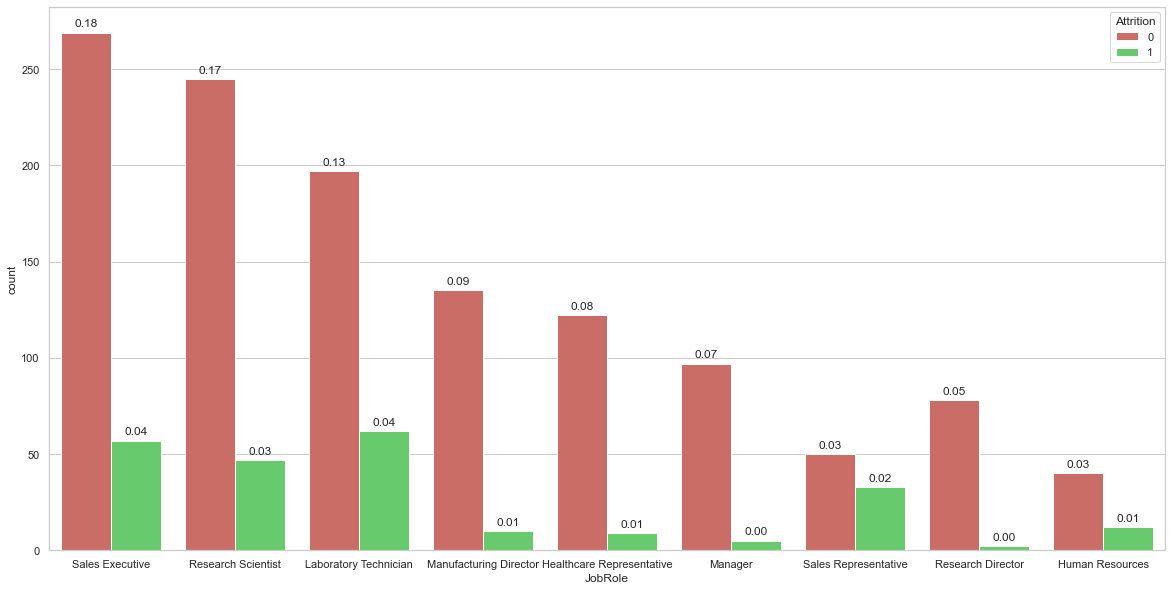

In [45]:
# Attrition Rate by JobRole

sns.set(style='whitegrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/employee_df.shape[0]),
               ha='center')

In [46]:
jobrole_att_ct = pd.crosstab(columns=[employee_df.Attrition],index=[employee_df.JobRole],margins=True)
jobrole_att_ct

Attrition,0,1,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [47]:
# Job Roles

(chi2, p, dof, _) = stats.chi2_contingency([jobrole_att_ct.iloc[0].values, \
                                            jobrole_att_ct.iloc[1].values, \
                                            jobrole_att_ct.iloc[2].values, \
                                            jobrole_att_ct.iloc[3].values, \
                                            jobrole_att_ct.iloc[4].values, \
                                            jobrole_att_ct.iloc[5].values, \
                                            jobrole_att_ct.iloc[6].values, \
                                            jobrole_att_ct.iloc[7].values, \
                                            jobrole_att_ct.iloc[8].values])

In [48]:
print('chi2     : ', chi2)
print('p-value  : ', p)
print('Degrees of Freedom : ', dof)

chi2     :  86.19025367670434
p-value  :  1.251359646014091e-11
Degrees of Freedom :  16


----

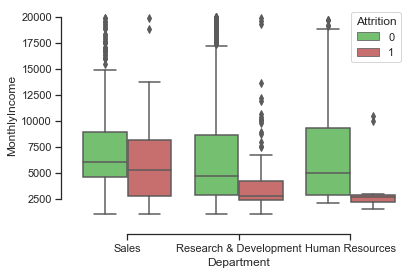

In [49]:
# Draw a nested boxplot to show MonthlyIncome by Departments

sns.set_theme(style="ticks", palette="muted")
sns.boxplot(x="Department", y="MonthlyIncome",
            hue="Attrition", palette=["g", "r"],
            data=employee_df)
sns.despine(offset=10, trim=True)

In [50]:
# Male employees at Job Level 1 or 2

lowlevel_male = employee_df[employee_df['JobLevel'].isin([1,2]) & (employee_df.Gender == 'Male')]
             

In [51]:
total_llm = lowlevel_male.value_counts().sum()
lowlevel_male.value_counts().sum()

658

In [52]:
left_llm = lowlevel_male[(lowlevel_male['Attrition']==1)].value_counts().sum()
lowlevel_male[(lowlevel_male['Attrition']==1)].value_counts().sum()

124

In [53]:
percent_llm = (left_llm / total_llm) * 100
print(round(percent_llm,2))

18.84


In [54]:
# Calculating the Std of the Lower Level Male Cohort

sigma1 = np.sqrt((((1-0.1884) ** 2 ) * 124 + ((0-0.1884) ** 2) * 534) / 658)
print(round(sigma1,3))

0.391


In [55]:
inverse_boolean_series = ~employee_df.isin(lowlevel_male)
inverse_filtered_df = employee_df[inverse_boolean_series]
company_total = inverse_filtered_df.value_counts().sum()
company_total

812

In [56]:
left_company = inverse_filtered_df[(inverse_filtered_df['Attrition']==1)].value_counts().sum()
left_company

113

In [57]:
percent_company = (left_company / company_total) * 100
print(round(percent_company,2))

13.92


In [58]:
# Calculating the Std of the remaining portion of the company

sigma2 = np.sqrt((((1-0.1392) ** 2 ) * 113 + ((0-0.1392) ** 2) * 699) / 812)
print(round(sigma2,3))

0.346


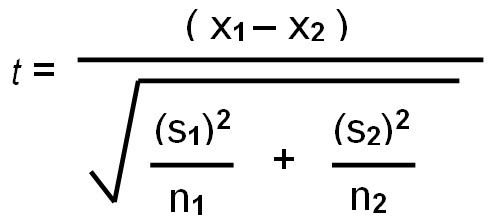

In [59]:
tstat = (0.1884 - 0.1392) / (np.sqrt((sigma1**2 / 658) + (sigma2**2 / 812)))
print(round(tstat,4))

2.524


-----

In [60]:
# Female employees at lower job levels

lowlevel_female = employee_df[employee_df['JobLevel'].isin([1,2]) & (employee_df.Gender == 'Female')]   

In [61]:
total_llf = lowlevel_female.value_counts().sum()
lowlevel_female.value_counts().sum()

419

In [62]:
left_llf = lowlevel_female[(lowlevel_female['Attrition']==1)].value_counts().sum()
lowlevel_female[(lowlevel_female['Attrition']==1)].value_counts().sum()

71

In [63]:
percent_llf = (left_llf / total_llf) * 100
print(round(percent_llf,2))

16.95


In [64]:
# Calculating the Std of the Lower Level Female Cohort

sigma1 = np.sqrt((((1-0.1695) ** 2 ) * 71 + ((0-0.1695) ** 2) * 348) / 419)
print(round(sigma1,3))

0.375


In [65]:
female_inverse_boolean_series = ~employee_df.isin(lowlevel_female)
female_inverse_filtered_df = employee_df[female_inverse_boolean_series]
company_total_female = female_inverse_filtered_df.value_counts().sum()
company_total_female

1051

In [66]:
left_company_female = female_inverse_filtered_df[(female_inverse_filtered_df['Attrition']==1)].value_counts().sum()
left_company_female

166

In [67]:
female_percent_company = (left_company / company_total) * 100
print(round(female_percent_company,2))

13.92


In [68]:
tstat = (0.1695 - 0.1579) / (np.sqrt((sigma1**2 / 419) + (sigma2**2 / 1051)))
print(round(tstat,4))

0.5469


---

In [69]:
# Male employees at Job Level 3,4,5

upperlevel_male = employee_df[employee_df['JobLevel'].isin([3,4,5]) & (employee_df.Gender == 'Male')]              

In [70]:
total_ulm = upperlevel_male.value_counts().sum()
upperlevel_male.value_counts().sum()

224

In [71]:
left_ulm = upperlevel_male[(upperlevel_male['Attrition']==1)].value_counts().sum()
upperlevel_male[(upperlevel_male['Attrition']==1)].value_counts().sum()

26

In [72]:
percent_ulm = (left_ulm / total_ulm) * 100
print(round(percent_ulm,2))

11.61


In [73]:
sigma1 = np.sqrt((((1-0.1161) ** 2 ) * 26 + ((0-0.1161) ** 2) * 198) / 224)
print(round(sigma1,3))

0.32


In [74]:
inverse_boolean_series = ~employee_df.isin(upperlevel_male)
inverse_filtered_df = employee_df[inverse_boolean_series]
company_total = inverse_filtered_df.value_counts().sum()
company_total

1246

In [75]:
ulm_left_company = inverse_filtered_df[(inverse_filtered_df['Attrition']==1)].value_counts().sum()
ulm_left_company

211

In [76]:
percent_company = (ulm_left_company / company_total) * 100
print(round(percent_company,2))

16.93


In [77]:
sigma2 = np.sqrt((((1-0.1693) ** 2 ) * 211 + ((0-0.1693) ** 2) * 1035) / 1246)
print(round(sigma2,3))

0.375


In [78]:
tstat = (0.1693 - 0.1161) / (np.sqrt((sigma1**2 / 224) + (sigma2**2 / 1246)))
print(round(tstat,4))

2.2265


In [79]:
# Creating a function to calculate the Standard Deviation

def sigma(x, left, total):
    sigma = np.sqrt((((1-x) ** 2 ) * left + ((0-x) ** 2) * (total - left)) / total)
    return sigma

In [80]:
# Creating a function to calculate the T-statistic

def tstat(x1, x2, sigma1, sigma2, n1, n2):
    tstat = abs(x1 - x2) / (np.sqrt((sigma1**2 / n1) + (sigma2**2 / n2)))
    return tstat


In [81]:
'''Creating a function to calculate the portion of the company not contained
inside of the selected cohort'''

def company_cohort(cohort, data):
    inverse_boolean_series = ~data.isin(cohort)
    inverse_filtered_df = data[inverse_boolean_series]
    company_total = inverse_filtered_df.value_counts().sum()
    
    return company_total

In [82]:
upperlevel_female = employee_df[employee_df['JobLevel'].isin([3,4,5]) & (employee_df.Gender == 'Female')]  

In [83]:
total_ulf = upperlevel_female.value_counts().sum()
upperlevel_female.value_counts().sum()

169

In [84]:
left_ulf = upperlevel_female[(upperlevel_female['Attrition']==1)].value_counts().sum()
upperlevel_female[(upperlevel_female['Attrition']==1)].value_counts().sum()

16

In [85]:
pct1 = left_ulf / total_ulf

In [86]:
simga1 = sigma(pct1, left_ulf, total_ulf)

-----

## Kaplan-Meier Survival Analysis

Simple test case. Two cohorts --> 

1) 'Low Level' Males \
2) 'Low Level' Females 

Low-Level defined as either a 1 or 2 in the JobLevel column